In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
yolo = cv2.dnn.readNet("/content/drive/MyDrive/Colab Notebooks/yolov3.weights", "/content/drive/MyDrive/Colab Notebooks/yolov3.cfg")

In [4]:
classes = []
with open("/content/drive/MyDrive/Colab Notebooks/yolov3.txt", 'r') as f:
    classes = f.read().splitlines()

In [5]:
len(classes)

80

In [6]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/dog.jpg")

#bgr to rgb conversion
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop = False)

In [7]:
blob.shape

(1, 3, 320, 320)

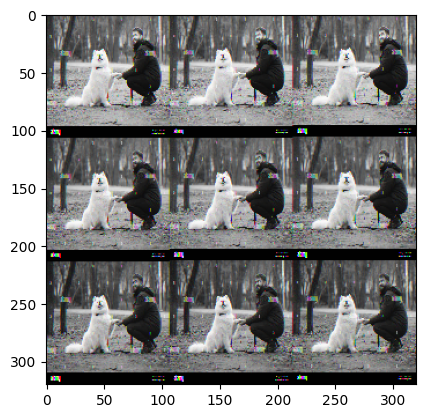

In [8]:
i = blob[0].reshape(320, 320, 3)
plt.imshow(i)

In [9]:
yolo.setInput(blob)

In [10]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layer_output = yolo.forward(output_layers_name)

In [11]:
width = img.shape[0]
height = img.shape[1]

boxes = []
confidences = []
class_ids = []

for output in layer_output:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            

In [12]:
len(boxes)

6

In [13]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [14]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [15]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i], 2))
    color = colors[i]
    
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    
    cv2.putText(img, label + " " + confi, (x, y+ 20), font, 2, (255, 255, 255), 2)

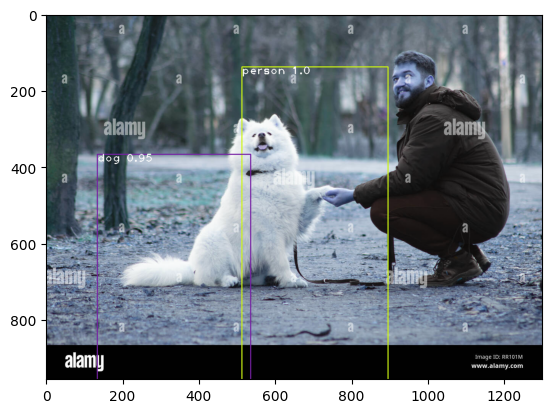

In [16]:
plt.imshow(img)